<h1> Capítulo 11 </h1>

In [5]:
library(foreign);library(dynlm);library(stargazer);library(pdfetch)

Warning message:
"package 'pdfetch' was built under R version 3.6.3"


In [3]:
#exemplo 11.4: efficient markets hypothesis

nyse = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\NYSE.DTA")

head(nyse) #cprice é o price lagged

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\NYSE.DTA"):
"cannot read factor labels from Stata 5 files"


,price,return,return_1,t,price_1,price_2,cprice,cprice_1
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,49.75,NA,NA,1,NA,NA,NA,NA
2,51.44,3.3969822,NA,2,49.75,NA,1.6899986,NA
3,52.05,1.1858488,3.3969822,3,51.44,49.75,0.6100006,1.6899986
4,52.28,0.4418819,1.1858488,4,52.05,51.44,0.2299995,0.6100006
5,54.24,3.7490492,0.4418819,5,52.28,52.05,1.9600029,0.2299995
6,53.76,-0.8849619,3.7490492,6,54.24,52.28,-0.4800034,1.9600029


In [4]:
tsdata = ts(nyse) #o indice vira t

#tres regressoes, com cada um com um lag a mais

reg1 = dynlm(return~L(return), data=tsdata)
reg2 = dynlm(return~L(return)+ L(return,2), data=tsdata)
reg3 = dynlm(return~L(return)+ L(return,2)+ L(return,3), data=tsdata)

#comparar as três regressoes (nenhuma é significitiva)

stargazer(reg1, reg2, reg3, type="text", keep.stat=c("n", "rsq", "adj.rsq", "f"))


                                 Dependent variable:                    
             -----------------------------------------------------------
                                       return                           
                     (1)                 (2)                 (3)        
------------------------------------------------------------------------
L(return)           0.059               0.060               0.061       
                   (0.038)             (0.038)             (0.038)      
                                                                        
L(return, 2)                           -0.038              -0.040       
                                       (0.038)             (0.038)      
                                                                        
L(return, 3)                                                0.031       
                                                           (0.038)      
                                                  

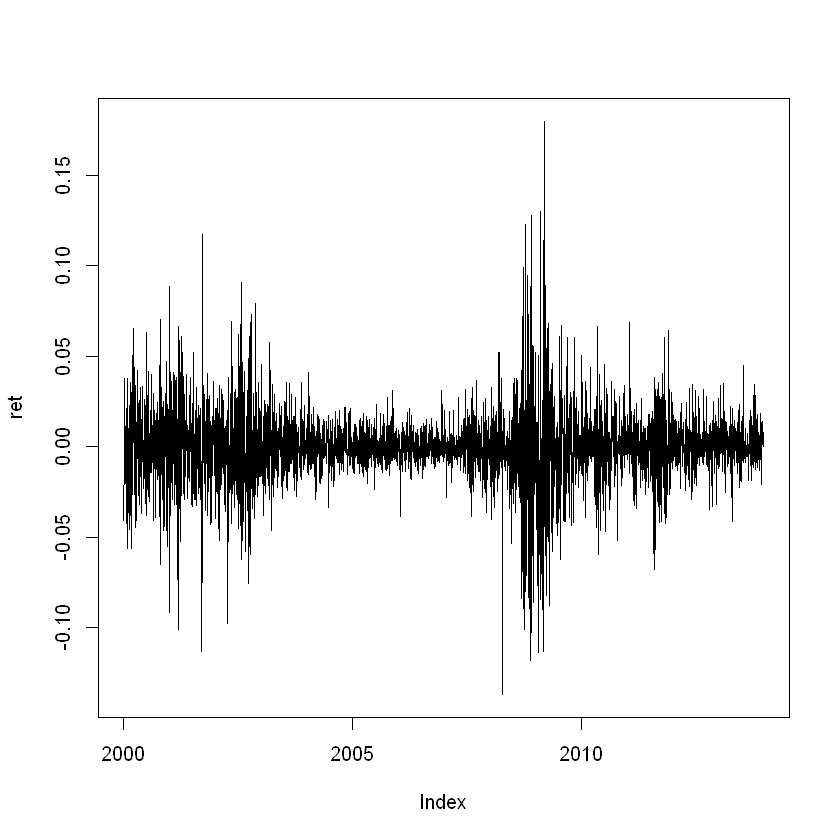

In [6]:
####fazendo a msm coisa pros dados da GE

library(zoo);library(pdfetch);library(dynlm);library(stargazer)

data_GE = zoo(pdfetch_YAHOO("GE", fields="adjclose",
						from="2000-01-01", to="2013-12-31"))

ret = diff(log(data_GE$GE))  #calcula a diferença de dia pra dia, nao importa
					  #se é fim de semana
plot(ret)

In [7]:
reg1 = dynlm(ret~L(ret))
reg2 = dynlm(ret~L(ret)+L(ret,2))
reg3 = dynlm(ret~L(ret)+L(ret,2)+L(ret,3))

stargazer(reg1, reg2, reg3, type="text", keep.stat=c("n", "rsq", "adj.rsq", "f"))


                                  Dependent variable:                      
             --------------------------------------------------------------
                                          ret                              
                     (1)                  (2)                  (3)         
---------------------------------------------------------------------------
L(ret)              -0.017               -0.017               -0.017       
                   (0.017)              (0.017)              (0.017)       
                                                                           
L(ret, 2)                                -0.011               -0.011       
                                        (0.017)              (0.017)       
                                                                           
L(ret, 3)                                                     -0.006       
                                                             (0.017)       
           

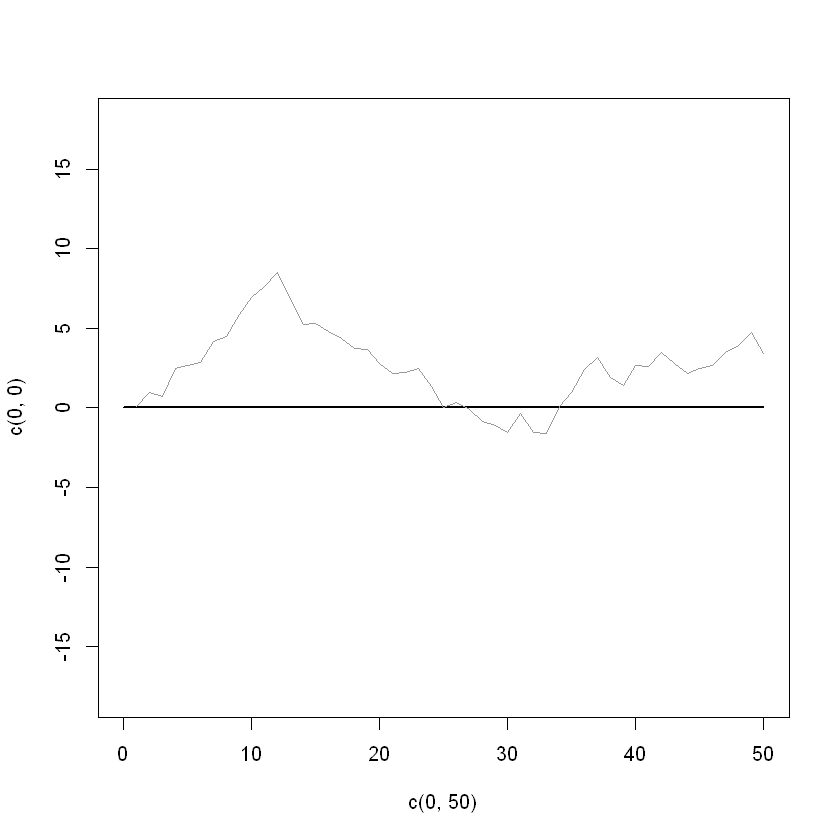

In [9]:
#script 11.3: simulating random walks sem drift

set.seed(348546)
plot(c(0,50), c(0,0), type="l", lwd=2, ylim=c(-18,18)) #linha

#loop gerando as random walks 

for (r in 1){            #o originial é 1:30
	e = rnorm(50)
	y = ts(cumsum(e))  #como gera numeros aleatorios, a curva "cai"
	lines(y, col=gray(.6))}

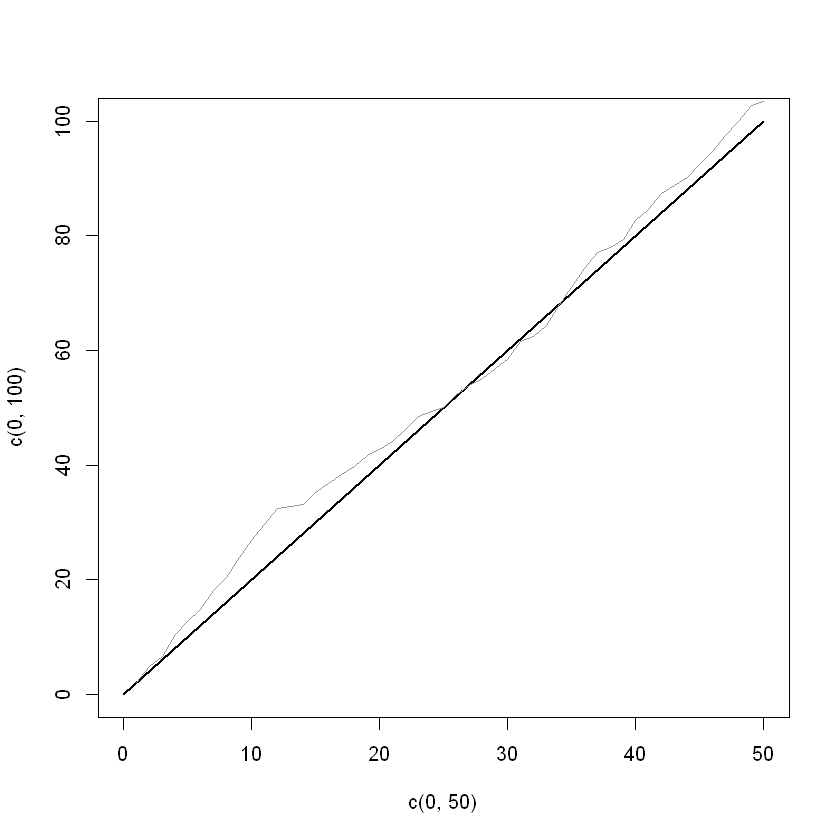

In [11]:
#script 11.4: simulating random walks com drift

set.seed(348546)
plot(c(0,50), c(0,100), type="l", lwd=2) #linha

for (r in 1){
	e = rnorm(50)
	y = ts(cumsum(2+e)) #drift
	lines(y, col=gray(.6))
}

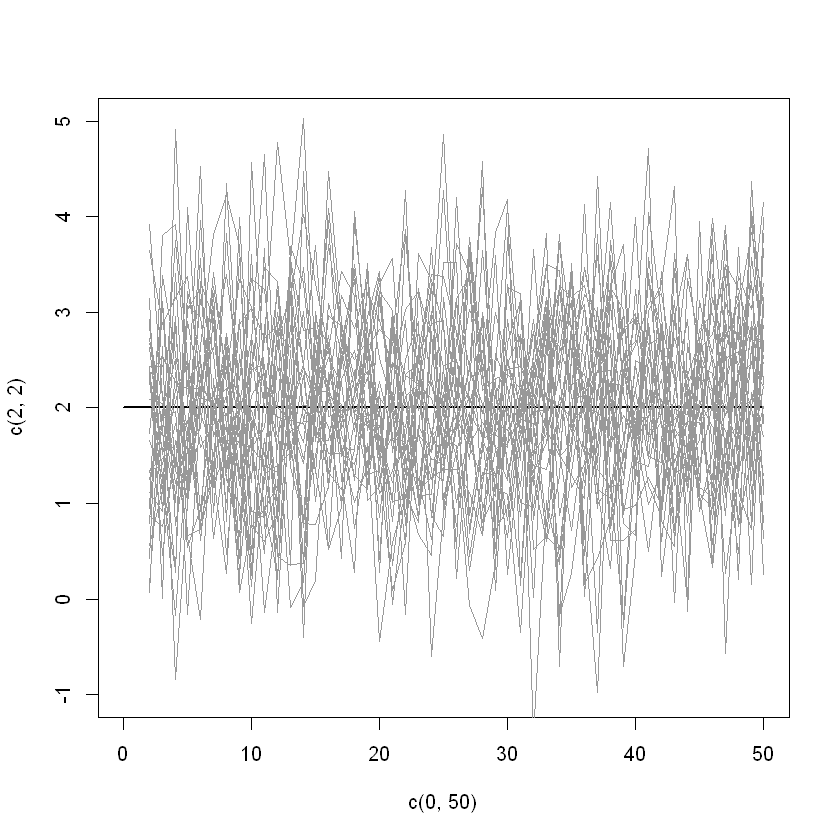

In [12]:
#script 11.5 Diff da random walk com drift

set.seed(348546)
plot(c(0,50),c(2,2),type="l",lwd=2,ylim=c(-1,5)) #a0 = 2

for(r in 1:30){
	e = rnorm(50)
	y = ts(cumsum(2+e))
	dy = diff(y)
	lines(dy, col=gray(.6))
}


In [13]:
#exemplo 11.6:regressao na diff


fertil = read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\fertil3.dta")

head(fertil)

Warning message in read.dta("C:\\Users\\vinic\\Desktop\\R\\heiss\\data_wooldridge\\fertil3.dta"):
"cannot read factor labels from Stata 5 files"


,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,124.7,0.00,1913,1,1,NA,NA,NA,NA,0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,126.6,0.00,1914,2,4,0.00,NA,NA,NA,0,...,NA,NA,NA,NA,124.7,NA,NA,NA,NA,NA
3,125.0,0.00,1915,3,9,0.00,0,NA,NA,0,...,0.00,NA,NA,NA,126.6,1.900002,NA,NA,NA,124.7
4,123.4,0.00,1916,4,16,0.00,0,0,NA,0,...,0.00,0,NA,NA,125.0,-1.599998,1.900002,NA,NA,126.6
5,121.0,19.27,1917,5,25,0.00,0,0,0,0,...,0.00,0,0,NA,123.4,-1.599998,-1.599998,1.900002,NA,125.0
6,119.8,23.94,1918,6,36,19.27,0,0,0,0,...,19.27,0,0,0,121.0,-2.400002,-1.599998,-1.599998,1.900002,123.4


In [14]:
tsdata = ts(fertil, start=1913)

res1 = dynlm( d(gfr) ~ d(pe), data=tsdata)

res2 = dynlm( d(gfr) ~ d(pe) + L(d(pe)) + L(d(pe),2),data=tsdata)

stargazer(res1, res2, type="text") #agora é significativo


                              Dependent variable:           
                    ----------------------------------------
                                     d(gfr)                 
                           (1)                  (2)         
------------------------------------------------------------
d(pe)                     -0.043              -0.036        
                         (0.028)              (0.027)       
                                                            
L(d(pe))                                      -0.014        
                                              (0.028)       
                                                            
L(d(pe), 2)                                  0.110***       
                                              (0.027)       
                                                            
Constant                  -0.785             -0.964**       
                         (0.502)              (0.468)       
                       